# loading the libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import time
import sklearn


In [2]:
df=pd.read_csv("advertising.csv")

In [3]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.sample(8)

,Unnamed: 0,TV,radio,newspaper,sales
58,59,210.8,49.6,37.7,23.8
9,10,199.8,2.6,21.2,10.6
160,161,172.5,18.1,30.7,14.4
93,94,250.9,36.5,72.3,22.2
35,36,290.7,4.1,8.5,12.8
14,15,204.1,32.9,46.0,19.0
173,174,168.4,7.1,12.8,11.7
113,114,209.6,20.6,10.7,15.9


In [6]:
df.shape

(200, 5)

the dataset contains 200 rows and 5 columns.
3 columns have independent variables'
1 column has the target or the dependent feature

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


there is no null value in any of the columns

In [8]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

# descriptive statistics

In [9]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


the first columns or the unnamed column does not have any information on which the target variable depends and thus can be dropped

In [12]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [13]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


from the descriptive statistics, it can be seen there is some degree of skewness is some columns like radio and newspaper

# Univariate analysis

TV, newspaper and radio are some of the most popular channels used by the companies to promote their products and services for improvment of sales. this dataset will identify the dependency of the sales on each of these channels.

<AxesSubplot:xlabel='TV', ylabel='Density'>

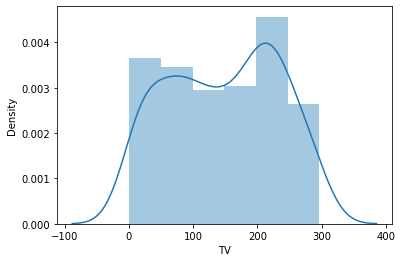

In [17]:
sns.distplot(df['TV'])

In [ ]:
observation: the graph is 

<AxesSubplot:xlabel='radio', ylabel='Density'>

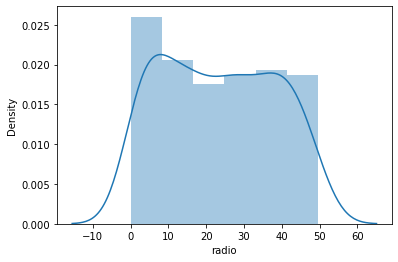

In [15]:
sns.distplot(df['radio'])

observation: the graph is also slightly skewed

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

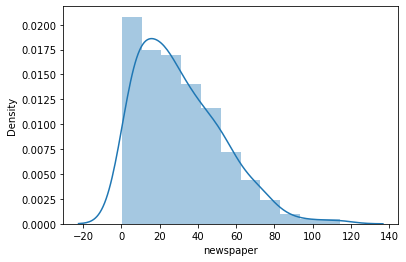

In [16]:
sns.distplot(df['newspaper'])

observation: the graph is right skewed

<AxesSubplot:xlabel='radio', ylabel='sales'>

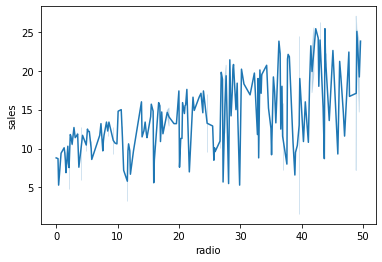

In [20]:
sns.lineplot(x=df['radio'],y=df['sales'])

it can be clearly seen that the sales incraeses with increase in promotion on TV

<AxesSubplot:xlabel='TV', ylabel='sales'>

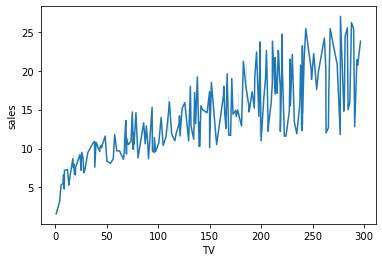

In [22]:
sns.lineplot(x=df['TV'],y=df['sales'])

it can be clearly seen that the sales incraeses with increase in promotion on TV

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

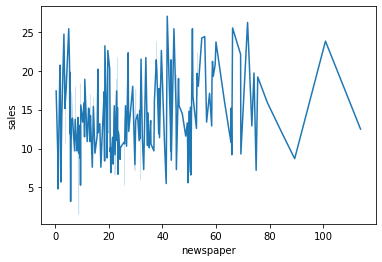

In [21]:
sns.lineplot(x=df['newspaper'],y=df['sales'])

the dependency of the sales on sales channel of newspaper cannot be determined clearly

boxplot will be used to identify the outliers

TV              AxesSubplot(0.125,0.125;0.168478x0.755)
radio        AxesSubplot(0.327174,0.125;0.168478x0.755)
newspaper    AxesSubplot(0.529348,0.125;0.168478x0.755)
sales        AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

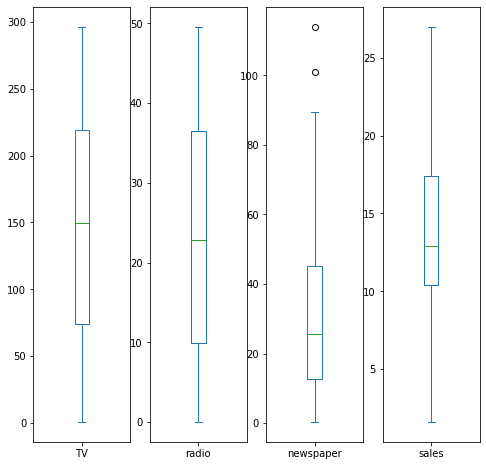

In [25]:
df.plot(kind='box',subplots=True,figsize=(8,8))

very minimum outliers are present in the newspaper column

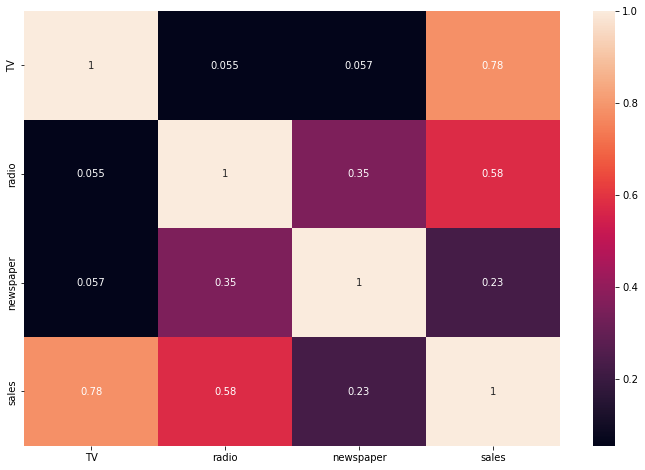

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

the sales is strongly correlated with the columns

# removal of outliers

In [30]:
from scipy.stats import zscore
z=np.abs(zscore(df))
np.where(z>3)

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))

In [31]:
dfn=df[(z<3).all(axis=1)]

In [33]:
dfn.shape

(198, 4)

In [34]:
df.shape

(200, 4)

dataloss=(200-198)/100=1 percent

# removal of skewness

In [35]:
df.skew().sort_values()

TV          -0.069853
radio        0.094175
sales        0.407571
newspaper    0.894720
dtype: float64

the skewness is in range

# scaling

In [36]:
x=df.drop(['sales'],axis=1)

In [37]:
y=df['sales']

In [38]:
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [39]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dfx=sc.fit_transform(x)
dfx.mean()


-2.960594732333751e-17

In [42]:
xx=pd.DataFrame(data=dfx,columns=x.columns)

In [44]:
x=xx

# spliting of data into training and testing data

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [104]:
x

,TV,radio,newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802
...,...,...,...
195,-1.270941,-1.321031,-0.771217
196,-0.617035,-1.240003,-1.033598
197,0.349810,-0.942899,-1.111852
198,1.594565,1.265121,1.640850


In [105]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [78]:
def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        if(maxacc<(r2_score(y_test,pred_test))):
            maxacc=r2_score(y_test,pred_test)
            rs=i                
        print(f"at random state {i}, training accuracy is {r2_score(y_train,pred_train)}")
        print(f"at random state {i}, testing accuracy is {r2_score(y_test,pred_test)}")
        print(f"at random state {i}, mean_squared_error is {mean_squared_error(y_test,pred_test)}")
        print(f"at random state {i}, mean_absolute_error is {mean_absolute_error(y_test,pred_test)}")
        print("\n")
    print(f"at random state {rs}, maximum accuracy is {maxacc}")

In [67]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


## linear regression

In [79]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model_selection(lr)

at random state 0, training accuracy is 0.9067114990146382
at random state 0, testing accuracy is 0.8601145185017868
at random state 0, mean_squared_error is 4.4021182914496855
at random state 0, mean_absolute_error is 1.3617813502090275


at random state 1, training accuracy is 0.8959372632325174
at random state 1, testing accuracy is 0.8927605914615386
at random state 1, mean_squared_error is 1.991885551828786
at random state 1, mean_absolute_error is 1.0402154012924711


at random state 2, training accuracy is 0.9151707412454462
at random state 2, testing accuracy is 0.7575894500772721
at random state 2, mean_squared_error is 4.503125945046122
at random state 2, mean_absolute_error is 1.6462745449078693


at random state 3, training accuracy is 0.8930288385772915
at random state 3, testing accuracy is 0.9138375011080567
at random state 3, mean_squared_error is 2.153781905661566
at random state 3, mean_absolute_error is 1.1986992501928753


at random state 4, training accuracy is 0.8

at random state 38, training accuracy is 0.8972213778715169
at random state 38, testing accuracy is 0.8927131887797297
at random state 38, mean_squared_error is 1.903707906973598
at random state 38, mean_absolute_error is 0.9879626972398057


at random state 39, training accuracy is 0.8989586369412048
at random state 39, testing accuracy is 0.8789549979127554
at random state 39, mean_squared_error is 3.1893837422150226
at random state 39, mean_absolute_error is 1.3705151577272532


at random state 40, training accuracy is 0.920068668721091
at random state 40, testing accuracy is 0.7982652261831079
at random state 40, mean_squared_error is 5.5449210792435215
at random state 40, mean_absolute_error is 1.5795751064324315


at random state 41, training accuracy is 0.9006901704189824
at random state 41, testing accuracy is 0.8819813651740449
at random state 41, mean_squared_error is 3.631878913941108
at random state 41, mean_absolute_error is 1.2308992088914152


at random state 42, trainin

at random state 79, training accuracy is 0.8917194183285055
at random state 79, testing accuracy is 0.9047106228248689
at random state 79, mean_squared_error is 2.5651846735270643
at random state 79, mean_absolute_error is 1.2392064621806917


at random state 80, training accuracy is 0.9161683973913906
at random state 80, testing accuracy is 0.8070473986760943
at random state 80, mean_squared_error is 4.849669475721287
at random state 80, mean_absolute_error is 1.4000258628179663


at random state 81, training accuracy is 0.9033802332142854
at random state 81, testing accuracy is 0.862042389496714
at random state 81, mean_squared_error is 3.1092748297620103
at random state 81, mean_absolute_error is 1.2961201811529095


at random state 82, training accuracy is 0.9154244887223795
at random state 82, testing accuracy is 0.8014727140935161
at random state 82, mean_squared_error is 4.466902397557535
at random state 82, mean_absolute_error is 1.3737905704481936


at random state 83, trainin

## KNeighborsRegressor

In [80]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
model_selection(knr)

at random state 0, training accuracy is 0.9628055662482428
at random state 0, testing accuracy is 0.9208117556891993
at random state 0, mean_squared_error is 2.4920099999999996
at random state 0, mean_absolute_error is 0.8755


at random state 1, training accuracy is 0.9600698483161428
at random state 1, testing accuracy is 0.9493087014880525
at random state 1, mean_squared_error is 0.9415499999999994
at random state 1, mean_absolute_error is 0.7244999999999997


at random state 2, training accuracy is 0.9548387027510317
at random state 2, testing accuracy is 0.9138128900479134
at random state 2, mean_squared_error is 1.60105
at random state 2, mean_absolute_error is 0.9745000000000001


at random state 3, training accuracy is 0.9591726912304193
at random state 3, testing accuracy is 0.9446223870659153
at random state 3, mean_squared_error is 1.3842600000000005
at random state 3, mean_absolute_error is 0.8880000000000006


at random state 4, training accuracy is 0.9574571794218336
at r

at random state 42, training accuracy is 0.9597456262952432
at random state 42, testing accuracy is 0.936301930131134
at random state 42, mean_squared_error is 2.01054
at random state 42, mean_absolute_error is 1.028


at random state 43, training accuracy is 0.9526883752013489
at random state 43, testing accuracy is 0.9661161381540837
at random state 43, mean_squared_error is 0.9753800000000006
at random state 43, mean_absolute_error is 0.682


at random state 44, training accuracy is 0.9641848009616669
at random state 44, testing accuracy is 0.8834202053406582
at random state 44, mean_squared_error is 2.0711100000000013
at random state 44, mean_absolute_error is 1.0535000000000008


at random state 45, training accuracy is 0.9632461074816551
at random state 45, testing accuracy is 0.96100177018074
at random state 45, mean_squared_error is 0.8428100000000012
at random state 45, mean_absolute_error is 0.6935000000000004


at random state 46, training accuracy is 0.9553029499658395
at r

at random state 86, training accuracy is 0.9550380173987582
at random state 86, testing accuracy is 0.9480936188712104
at random state 86, mean_squared_error is 1.28502
at random state 86, mean_absolute_error is 0.8390000000000002


at random state 87, training accuracy is 0.9702548355114832
at random state 87, testing accuracy is 0.8367958512959893
at random state 87, mean_squared_error is 2.97085
at random state 87, mean_absolute_error is 1.0485


at random state 88, training accuracy is 0.969960658365637
at random state 88, testing accuracy is 0.9104978188953775
at random state 88, mean_squared_error is 2.3774800000000007
at random state 88, mean_absolute_error is 0.9170000000000001


at random state 89, training accuracy is 0.9552499076317319
at random state 89, testing accuracy is 0.9413180242185656
at random state 89, mean_squared_error is 1.6717599999999997
at random state 89, mean_absolute_error is 0.8749999999999997


at random state 90, training accuracy is 0.9610992173983302

## DecisionTreeRegressor

In [81]:
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor()
model_selection(dtc)

at random state 0, training accuracy is 1.0
at random state 0, testing accuracy is 0.9281763599650534
at random state 0, mean_squared_error is 2.26025
at random state 0, mean_absolute_error is 0.9925


at random state 1, training accuracy is 1.0
at random state 1, testing accuracy is 0.9534703895290206
at random state 1, mean_squared_error is 0.86425
at random state 1, mean_absolute_error is 0.7175


at random state 2, training accuracy is 1.0
at random state 2, testing accuracy is 0.9544046206368213
at random state 2, mean_squared_error is 0.8470000000000001
at random state 2, mean_absolute_error is 0.7


at random state 3, training accuracy is 1.0
at random state 3, testing accuracy is 0.9610649287069641
at random state 3, mean_squared_error is 0.9732499999999996
at random state 3, mean_absolute_error is 0.7875


at random state 4, training accuracy is 1.0
at random state 4, testing accuracy is 0.9594255143519614
at random state 4, mean_squared_error is 0.984
at random state 4, mean_

at random state 45, training accuracy is 1.0
at random state 45, testing accuracy is 0.9413622207396006
at random state 45, mean_squared_error is 1.2672500000000004
at random state 45, mean_absolute_error is 0.8975000000000002


at random state 46, training accuracy is 1.0
at random state 46, testing accuracy is 0.8696707704474926
at random state 46, mean_squared_error is 2.5275000000000007
at random state 46, mean_absolute_error is 1.15


at random state 47, training accuracy is 1.0
at random state 47, testing accuracy is 0.968920954430039
at random state 47, mean_squared_error is 0.8760000000000001
at random state 47, mean_absolute_error is 0.7500000000000002


at random state 48, training accuracy is 1.0
at random state 48, testing accuracy is 0.9658824341106664
at random state 48, mean_squared_error is 0.9889999999999999
at random state 48, mean_absolute_error is 0.7100000000000001


at random state 49, training accuracy is 1.0
at random state 49, testing accuracy is 0.963056459218

at random state 97, training accuracy is 1.0
at random state 97, testing accuracy is 0.9645159926166386
at random state 97, mean_squared_error is 1.1484999999999999
at random state 97, mean_absolute_error is 0.8300000000000001


at random state 98, training accuracy is 1.0
at random state 98, testing accuracy is 0.9618446423518636
at random state 98, mean_squared_error is 1.3080000000000003
at random state 98, mean_absolute_error is 0.805


at random state 99, training accuracy is 1.0
at random state 99, testing accuracy is 0.9361007408100928
at random state 99, mean_squared_error is 1.638
at random state 99, mean_absolute_error is 0.8399999999999999


at random state 75, maximum accuracy is 0.978866178000704


## ensembling technique with random forest regressor

In [82]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_selection(rf)

at random state 0, training accuracy is 0.9964180492937053
at random state 0, testing accuracy is 0.9672310763357551
at random state 0, mean_squared_error is 1.0312197999999997
at random state 0, mean_absolute_error is 0.7263000000000008


at random state 1, training accuracy is 0.9963518810230874
at random state 1, testing accuracy is 0.9785939483914342
at random state 1, mean_squared_error is 0.3976001499999994
at random state 1, mean_absolute_error is 0.5205000000000004


at random state 2, training accuracy is 0.9973911389309319
at random state 2, testing accuracy is 0.9721678227567105
at random state 2, mean_squared_error is 0.5170228749999974
at random state 2, mean_absolute_error is 0.5856250000000005


at random state 3, training accuracy is 0.9968895588844269
at random state 3, testing accuracy is 0.9818660580540617
at random state 3, mean_squared_error is 0.45328949999999607
at random state 3, mean_absolute_error is 0.5032999999999983


at random state 4, training accuracy is

at random state 34, training accuracy is 0.9971096772159148
at random state 34, testing accuracy is 0.98073385735134
at random state 34, mean_squared_error is 0.571959274999997
at random state 34, mean_absolute_error is 0.5959249999999994


at random state 35, training accuracy is 0.9975133344528083
at random state 35, testing accuracy is 0.9636394645661176
at random state 35, mean_squared_error is 0.7671797999999972
at random state 35, mean_absolute_error is 0.5947499999999974


at random state 36, training accuracy is 0.9969161212574392
at random state 36, testing accuracy is 0.9818442846123057
at random state 36, mean_squared_error is 0.533836925000001
at random state 36, mean_absolute_error is 0.5655250000000013


at random state 37, training accuracy is 0.9969153119564713
at random state 37, testing accuracy is 0.9758072400829918
at random state 37, mean_squared_error is 0.6075019750000011
at random state 37, mean_absolute_error is 0.6487250000000009


at random state 38, training

at random state 69, training accuracy is 0.9961468038089737
at random state 69, testing accuracy is 0.9871402799324642
at random state 69, mean_squared_error is 0.3566447250000012
at random state 69, mean_absolute_error is 0.46312499999999945


at random state 70, training accuracy is 0.9967918180302136
at random state 70, testing accuracy is 0.9800077038645877
at random state 70, mean_squared_error is 0.5776042999999949
at random state 70, mean_absolute_error is 0.6152499999999967


at random state 71, training accuracy is 0.9972889516851708
at random state 71, testing accuracy is 0.9763619269051705
at random state 71, mean_squared_error is 0.7426793000000007
at random state 71, mean_absolute_error is 0.5148000000000007


at random state 72, training accuracy is 0.9958814825860288
at random state 72, testing accuracy is 0.984315237470613
at random state 72, mean_squared_error is 0.45154382499999696
at random state 72, mean_absolute_error is 0.5127749999999981


at random state 73, tra

we will be proceed with the random forest regressor model for building the ML model, beacuse with this model the testing accuracy is the highest and the mean absolute error and mean squared error are minimum

# Cross Val Score

In [83]:
from sklearn.model_selection import cross_val_score


In [86]:
score=cross_val_score(rf,x,y,cv=8)
print(score)
print(score.mean())
print(score.std())

[0.98361436 0.97917853 0.98079756 0.98277778 0.97838266 0.96824092
 0.96712477 0.98247036]
0.9778233665640117
0.006092565022407537


In [91]:
score=cross_val_score(lr,x,y,cv=6)
print(score)
print(score.mean())
print(score.std())

[0.87841656 0.91396029 0.90508856 0.8438298  0.8950119  0.90321822]
0.8899208882186672
0.02333604899792169


In [89]:
score=cross_val_score(dtc,x,y,cv=8)
print(score)
print(score.mean())
print(score.std())

[0.96933417 0.95768706 0.97232522 0.94509638 0.94044971 0.91680419
 0.87656606 0.97304533]
0.9439135148338968
0.03117651436059349


In [90]:
score=cross_val_score(knr,x,y,cv=8)
print(score)
print(score.mean())
print(score.std())

[0.9215239  0.94571527 0.95512392 0.98275254 0.96096467 0.89859508
 0.90443035 0.95688584]
0.940748945890789
0.027681834121402186


observation: for the random forest regressor model, with cv = 8, the cv score is maximum and there is no presence of any underfitting or overfitting in the model.

# Final model

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=47,test_size=0.20)
instance=rf
instance.fit(x_train,y_train)
pred_train=instance.predict(x_train)
pred_test=instance.predict(x_test)          
print(f"at random state {47}, training accuracy is {r2_score(y_train,pred_train)}")
print(f"at random state {47}, testing accuracy is {r2_score(y_test,pred_test)}")
print(f"at random state {47}, mean_squared_error is {mean_squared_error(y_test,pred_test)}")
print(f"at random state {47}, mean_absolute_error is {mean_absolute_error(y_test,pred_test)}")

at random state 47, training accuracy is 0.9963094892177757
at random state 47, testing accuracy is 0.9894562031810342
at random state 47, mean_squared_error is 0.2971895000000022
at random state 47, mean_absolute_error is 0.43134999999999984


# Prediction

In [108]:
import numpy as np
s=np.array([0.394182,-0.841614,1.281802])
s.shape
s.reshape(-1,1)

array([[ 0.394182],
       [-0.841614],
       [ 1.281802]])

In [109]:
predval=rf.predict(s.reshape(1,-1))
print(predval)

[13.315]


# Saving the final model

In [110]:
import pickle
filename="advertisement_sales.pkl"
pickle.dump(rf,open(filename,'wb'))